## Run the code below and finish the questions.

In [ ]:
import atoti as tt

: 

In [ ]:
session = tt.Session()

In [ ]:
# load fact and dimension tables
sales_table = session.read_csv("data/sales.csv", keys=["Sale ID"])
products_table = session.read_csv("data/products.csv", keys=["Product"])
shops_table = session.read_csv("data/shops.csv", keys=["Shop ID"])

In [ ]:
# view the product table details
products_table.head()

,Category,Sub category,Size,Purchase price,Color,Brand
Product,,,,,,
TSH_10,Cloth,T-shirt,L,20.0,black,Over
TAB_22,Furniture,Table,2m40,280.0,blue,Basic
HOO_34,Cloth,Hoodie,M,38.0,brown,Over
BED_46,Furniture,Bed,Double,252.0,white,Basic
SHO_58,Cloth,Shoes,8,42.0,red,Over


In [ ]:
# view the shop table details
shops_table.head()

,City,State or region,Country,Shop size
Shop ID,,,,
shop_10,Nice,Provence-Alpes-Côte d'Azur,France,medium
shop_22,Marseille,Provence-Alpes-Côte d'Azur,France,small
shop_34,Paris,Île-de-France,France,small
shop_11,Lyon,Auvergne-Rhône-Alpes,France,medium
shop_23,Nice,Provence-Alpes-Côte d'Azur,France,small


In [ ]:
# view the sale table details
sales_table.head()

,Date,Shop,Product,Quantity,Unit price
Sale ID,,,,,
S000001427,2021-01-18,shop_27,BED_24,1.0,150.0
S000000001,2021-02-03,shop_1,TAB_1,1.0,300.0
S000001434,2021-01-11,shop_34,TSH_31,3.0,24.0
S000000009,2021-01-26,shop_9,TSH_9,1.0,22.0
S000002861,2021-01-24,shop_21,HOO_55,1.0,48.0


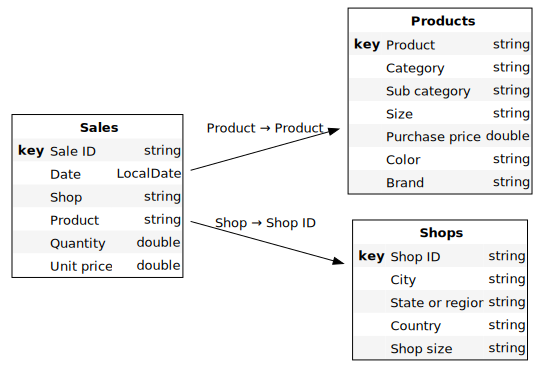

In [ ]:
# star schema
sales_table.join(products_table, sales_table["Product"] == products_table["Product"])
sales_table.join(shops_table, sales_table["Shop"] == shops_table["Shop ID"])
# visualise the schema
session.tables.schema

In [ ]:
# create cube
cube = session.create_cube(sales_table)
cube

In [ ]:
# The cube has automatically created a hierarchy, level and measures
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [ ]:
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x124b2c820>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x124a53040>, 'Unit price.SUM': <atoti.measure.Measure object at 0x124c24040>, 'Unit price.MEAN': <atoti.measure.Measure object at 0x124c24070>, 'Quantity.SUM': <atoti.measure.Measure object at 0x124c24820>, 'Quantity.MEAN': <atoti.measure.Measure object at 0x124c248e0>}

Some measures have been automatically created from numeric columns but are not useful. For instance, Unit Price.SUM does not really make sense as we never want to sum the unit prices. We can delete it:

In [ ]:
del measures["Unit price.SUM"]
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x124ab5570>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x124ab5cf0>, 'Unit price.MEAN': <atoti.measure.Measure object at 0x124b2f580>, 'Quantity.SUM': <atoti.measure.Measure object at 0x124b2c9a0>, 'Quantity.MEAN': <atoti.measure.Measure object at 0x124b2ceb0>}

you can also create some measures based on the need, e.g. tt.agg.sum() and tt.agg.mean()
```python
m["Amount.SUM"] = tt.agg.sum(sales_table["Quantity"] * sales_table["Unit price"])
m["Amount.MEAN"] = tt.agg.mean(
    sales_table["Quantity"] * sales_table["Unit price"],
)
```

In [ ]:
hierarchies

{('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x124bb3160>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x124bb22f0>, ('Shops', 'State or region'): <atoti.hierarchy.Hierarchy object at 0x124bb3280>, ('Shops', 'Country'): <atoti.hierarchy.Hierarchy object at 0x124bb3b20>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x124bb37f0>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x124bb3c70>, ('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x124bb2380>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124bb3610>, ('Products', 'Sub category'): <atoti.hierarchy.Hierarchy object at 0x124bb3ac0>, ('Products', 'Category'): <atoti.hierarchy.Hierarchy object at 0x124bb1bd0>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x124bb3670>, ('Shops', 'City'): <atoti.hierarchy.Hierarchy object at 0x124bb3b80>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x124bb31f0>}

You can see that the cube has automatically created a hierarchy for each non-numeric column in each table.

In [ ]:
# Hierarchies are made of levels in Atoti. Levels of the same hierarchy are attributes with a parent-child relationship.
levels

In [ ]:
# In Products dimension table, we can group the Category, SubCategory and Product ID levels into a Product hierarchy:

# option 1:
#hierarchies["Product"] = [levels["Product"], levels["Sub category"], levels["Category"]]

# option 2:
hierarchies["Product"] = [levels["Category"], levels["Sub category"], levels["Product"]]

hierarchies
# Your task: Do the above two options have the same results? Why?

{('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x124c267d0>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x124c242e0>, ('Shops', 'State or region'): <atoti.hierarchy.Hierarchy object at 0x124c27400>, ('Shops', 'Country'): <atoti.hierarchy.Hierarchy object at 0x124c26710>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x124c26800>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x124c24cd0>, ('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x124c245e0>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124c24760>, ('Products', 'Sub category'): <atoti.hierarchy.Hierarchy object at 0x124c25360>, ('Products', 'Category'): <atoti.hierarchy.Hierarchy object at 0x124c25750>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x124c24280>, ('Shops', 'City'): <atoti.hierarchy.Hierarchy object at 0x124c25e70>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x124c27190>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124bb2fe0>}

In [ ]:
# remove the old hierarchy
del hierarchies["Category"]
del hierarchies["Sub category"]

In [ ]:
hierarchies

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x124c27340>, ('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x124c27460>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x124c244f0>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124c26bc0>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x124c250c0>, ('Shops', 'State or region'): <atoti.hierarchy.Hierarchy object at 0x124c24970>, ('Shops', 'City'): <atoti.hierarchy.Hierarchy object at 0x124c493f0>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x124c489d0>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124c48ac0>, ('Shops', 'Country'): <atoti.hierarchy.Hierarchy object at 0x124c48610>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x124c4a9e0>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x124c4a080>}

In [ ]:
# In Shops dimension table, we can group City, State or Region and Country into a Geography hierarchy:

# option 1:
# hierarchies["Geography"] = [
#     shops_table["Country"],
#     shops_table["State or region"],
#     shops_table["City"],
# ]

# option 2:
hierarchies["Geography"] = [levels["Country"], levels["State or region"], levels["City"]]

# Your task: Do the above two options have the same results?

In [ ]:
del hierarchies["Country"]
del hierarchies["State or region"]
del hierarchies["City"]

In [ ]:
hierarchies

{('Products', 'Brand'): <atoti.hierarchy.Hierarchy object at 0x124c4b100>, ('Sales', 'Sale ID'): <atoti.hierarchy.Hierarchy object at 0x124c4a8f0>, ('Shops', 'Shop size'): <atoti.hierarchy.Hierarchy object at 0x124c4b670>, ('Sales', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124c4bb20>, ('Products', 'Size'): <atoti.hierarchy.Hierarchy object at 0x124c4b610>, ('Sales', 'Date'): <atoti.hierarchy.Hierarchy object at 0x124c485e0>, ('Products', 'Product'): <atoti.hierarchy.Hierarchy object at 0x124c4b370>, ('Products', 'Color'): <atoti.hierarchy.Hierarchy object at 0x124c4b310>, ('Sales', 'Shop'): <atoti.hierarchy.Hierarchy object at 0x124c48880>, ('Shops', 'Geography'): <atoti.hierarchy.Hierarchy object at 0x124c49510>}

## After cleaning all hierarchies, we can query our data warehouse. Think about the starnet!

In [ ]:
# query 1 (roll-up to ALL): what is the sold quantities over the whole dataset?
cube.query(measures["Quantity.SUM"])

,Quantity.SUM
0,"8,077.00"


In [ ]:
levels

In [ ]:
# query 2 (dice): what is the sold quantities for each shop?
cube.query(measures["Quantity.SUM"], levels=[levels["Shop"]])

# Your task: Add "Shop" to the Geography hierarchy and observe the outcome.
# Hint: If errors occur in the query after adding "Shop" to the Geography hierarchy, check for duplicate "Shop" levels.
# If there are levels with the same name but different parents, specify the parent, e.g., cube.query(measures["Quantity.SUM"], levels=[levels[('Shops', 'Geography', 'Shop')]])

,Quantity.SUM
Shop,
shop_0,202.00
shop_1,202.00
shop_10,203.00
shop_11,203.00
shop_12,201.00
shop_13,202.00
shop_14,202.00
shop_15,202.00
shop_16,201.00


In [ ]:
# query 3 (slice): what is the sold quantities for shop_36?
cube.query(
    measures["Quantity.SUM"],
    filter=levels["Shop"] == "shop_36"
)

# Your task: after adding "Shop" to the Geography hierarchy, you need to specify the parent in filter. 
# e.g. filter=levels[('Sales', 'Shop', 'Shop')]== "shop_36"

,Quantity.SUM
0,203.00


In [ ]:
# query 4: What is the sold quantities sold by date and product?
cube.query(measures["Quantity.SUM"], levels=[levels["Date"], levels[('Sales', 'Product', 'Product')]])

# Your task: run the following code and explain why it does not work. Hint: check how many 'Product' in levels
# cube.query(measures["Quantity.SUM"], levels=[levels["Date"], levels["Product"]])

Quantity.SUM
Date       Product             
2021-01-06 BED_24          8.00
           BED_25          4.00
           BED_26          6.00
           BED_27          4.00
           BED_3           2.00
...                         ...
2021-02-04 TSH_52          6.00
           TSH_53          4.00
           TSH_7           3.00
           TSH_8           5.00
           TSH_9           3.00

[1830 rows x 1 columns]

In [ ]:
cube.query(measures["Quantity.SUM"], levels=[levels["Date"], levels[('Products', 'Product', 'Sub category')]])

Quantity.SUM
Date       Category  Sub category             
2021-01-06 Cloth     Hoodie              37.00
                     Shoes               71.00
                     T-shirt             66.00
           Furniture Bed                 53.00
                     Chair               15.00
...                                        ...
2021-02-04 Cloth     Shoes               76.00
                     T-shirt             69.00
           Furniture Bed                 49.00
                     Chair               13.00
                     Table               26.00

[180 rows x 1 columns]

In [ ]:
# rollup
cube.query(measures["Quantity.SUM"], levels=[levels["Date"], levels[('Products', 'Product', 'Category')]])

Quantity.SUM
Date       Category              
2021-01-06 Cloth           174.00
           Furniture        94.00
2021-01-07 Cloth           177.00
           Furniture        89.00
2021-01-08 Cloth           174.00
           Furniture        94.00
2021-01-09 Cloth           177.00
           Furniture        93.00
2021-01-10 Cloth           177.00
           Furniture        91.00
2021-01-11 Cloth           176.00
           Furniture        93.00
2021-01-12 Cloth           177.00
           Furniture        88.00
2021-01-13 Cloth           178.00
           Furniture        92.00
2021-01-14 Cloth           175.00
           Furniture        93.00
2021-01-15 Cloth           179.00
           Furniture        91.00
2021-01-16 Cloth           178.00
           Furniture        89.00
2021-01-17 Cloth           178.00
           Furniture        93.00
2021-01-18 Cloth           180.00
           Furniture        91.00
2021-01-19 Cloth           181.00
           Furniture        90.00
2021-01-20 Cloth           176.00
           Furniture        91.00
2021-01-21 Cloth           178.00
           Furniture        92.00
2021-01-22 Cloth           179.00
           Furniture        92.00
2021-01-23 Cloth           175.00
           Furniture        94.00
2021-01-24 Cloth           183.00
           Furniture        87.00
2021-01-25 Cloth           176.00
           Furniture        93.00
2021-01-26 Cloth           184.00
           Furniture        87.00
2021-01-27 Cloth           173.00
           Furniture        96.00
2021-01-28 Cloth           179.00
           Furniture        92.00
2021-01-29 Cloth           168.00
           Furniture        99.00
2021-01-30 Cloth           172.00
           Furniture        99.00
2021-01-31 Cloth           173.00
           Furniture        98.00
2021-02-01 Cloth           170.00
           Furniture       101.00
2021-02-02 Cloth           176.00
           Furniture        91.00
2021-02-03 Cloth           174.00
           Furniture        96.00
2021-02-04 Cloth           183.00
           Furniture        88.00

In [ ]:
# drilldown
cube.query(measures["Quantity.SUM"], levels=[levels["Date"], levels[('Products', 'Product', 'Product')]])

Quantity.SUM
Date       Category  Sub category Product             
2021-01-06 Cloth     Hoodie       HOO_12          4.00
                                  HOO_13          6.00
                                  HOO_14          4.00
                                  HOO_33          5.00
                                  HOO_34          2.00
...                                                ...
2021-02-04 Furniture Table        TAB_1           3.00
                                  TAB_21          6.00
                                  TAB_22          3.00
                                  TAB_42          4.00
                                  TAB_43          6.00

[1830 rows x 1 columns]

In [ ]:
# query 5: What is the sold quantities sold by date and product for shop_36
cube.query(
    measures["Quantity.SUM"],
    levels=[levels["Date"], levels[('Sales', 'Product', 'Product')]],
    filter=levels["Shop"] == "shop_36",
)

Quantity.SUM
Date       Product             
2021-01-09 BED_25          1.00
           BED_27          2.00
           BED_3           1.00
           BED_45          1.00
           BED_46          1.00
...                         ...
2021-01-29 TSH_32          1.00
           TSH_49          3.00
           TSH_51          1.00
           TSH_53          4.00
           TSH_8           1.00

[125 rows x 1 columns]

In [ ]:
# query
session.link

http://localhost:50772

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.